In [1]:
!wget https://www.dropbox.com/s/3jkwy16m6xdlktb/18_5.JPG

--2023-10-23 11:31:45--  https://www.dropbox.com/s/3jkwy16m6xdlktb/18_5.JPG
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3jkwy16m6xdlktb/18_5.JPG [following]
--2023-10-23 11:31:46--  https://www.dropbox.com/s/raw/3jkwy16m6xdlktb/18_5.JPG
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6f1a0a12f3344331cd2225090e.dl.dropboxusercontent.com/cd/0/inline/CGIyK4JXNBGr1IrDcQyGGtqtCtg87aTWk1T5sYyercsHBXGiloZQw9a3WjrVBzvZsMdfMzu-EsCfcYB5aqZP4cmz2vWKVQDqMo7aXqBEcotNV_GQwISDliIFM8gXMO8bUnowYjasyrubMNb0BBFVVMOc/file# [following]
--2023-10-23 11:31:47--  https://uc6f1a0a12f3344331cd2225090e.dl.dropboxusercontent.com/cd/0/inline/CGIyK4JXNBGr1IrDcQyGGtqtCtg87aTWk1T5sYyercsHBXGiloZQw9a3WjrVBzvZsMdfMzu-EsCfcYB5aqZP4cmz2vWKVQDqMo7aXqBEcotNV_GQ

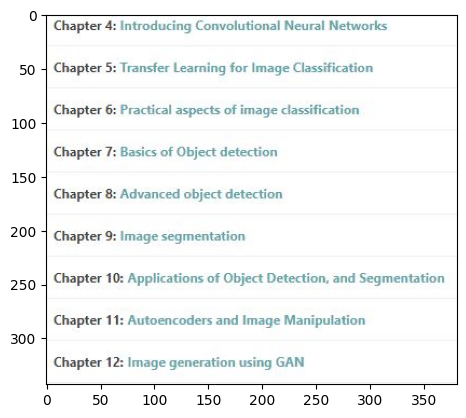

In [2]:
import cv2, numpy as np
img = cv2.imread('18_5.JPG')
img1 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
import matplotlib.pyplot as plt
plt.imshow(img1)

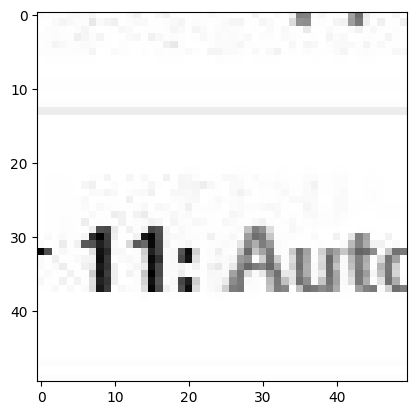

In [3]:
img_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
crop = img_gray[250:300, 50:100]
plt.imshow(crop, cmap='gray')

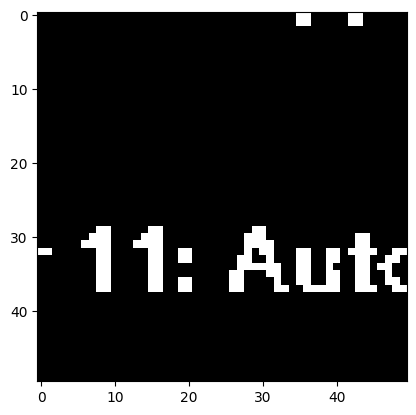

In [4]:
_img_gray = np.uint8(img_gray < 200) * 255
crop = _img_gray[250:300, 50:100]
plt.imshow(crop, cmap='gray')

In [5]:
contours, hierarchy = cv2.findContours(_img_gray,
                                       cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [6]:
thresh1 = np.stack([_img_gray]*3, axis=2)

In [7]:
thresh2 = np.zeros((thresh1.shape[0], thresh1.shape[1]))

In [8]:
for cnt in contours:
  if cv2.contourArea(cnt) > 0:
    [x, y, w, h] = cv2.boundingRect(cnt)
    if ((h > 5) & (h < 100)):
      thresh2[y: (y+h), x: (x+w)] = thresh1[y: (y+h), x: (x+w), 0].copy()
      cv2.rectangle(thresh1, (x, y), (x+w, y+h), (255, 0, 0), 2)

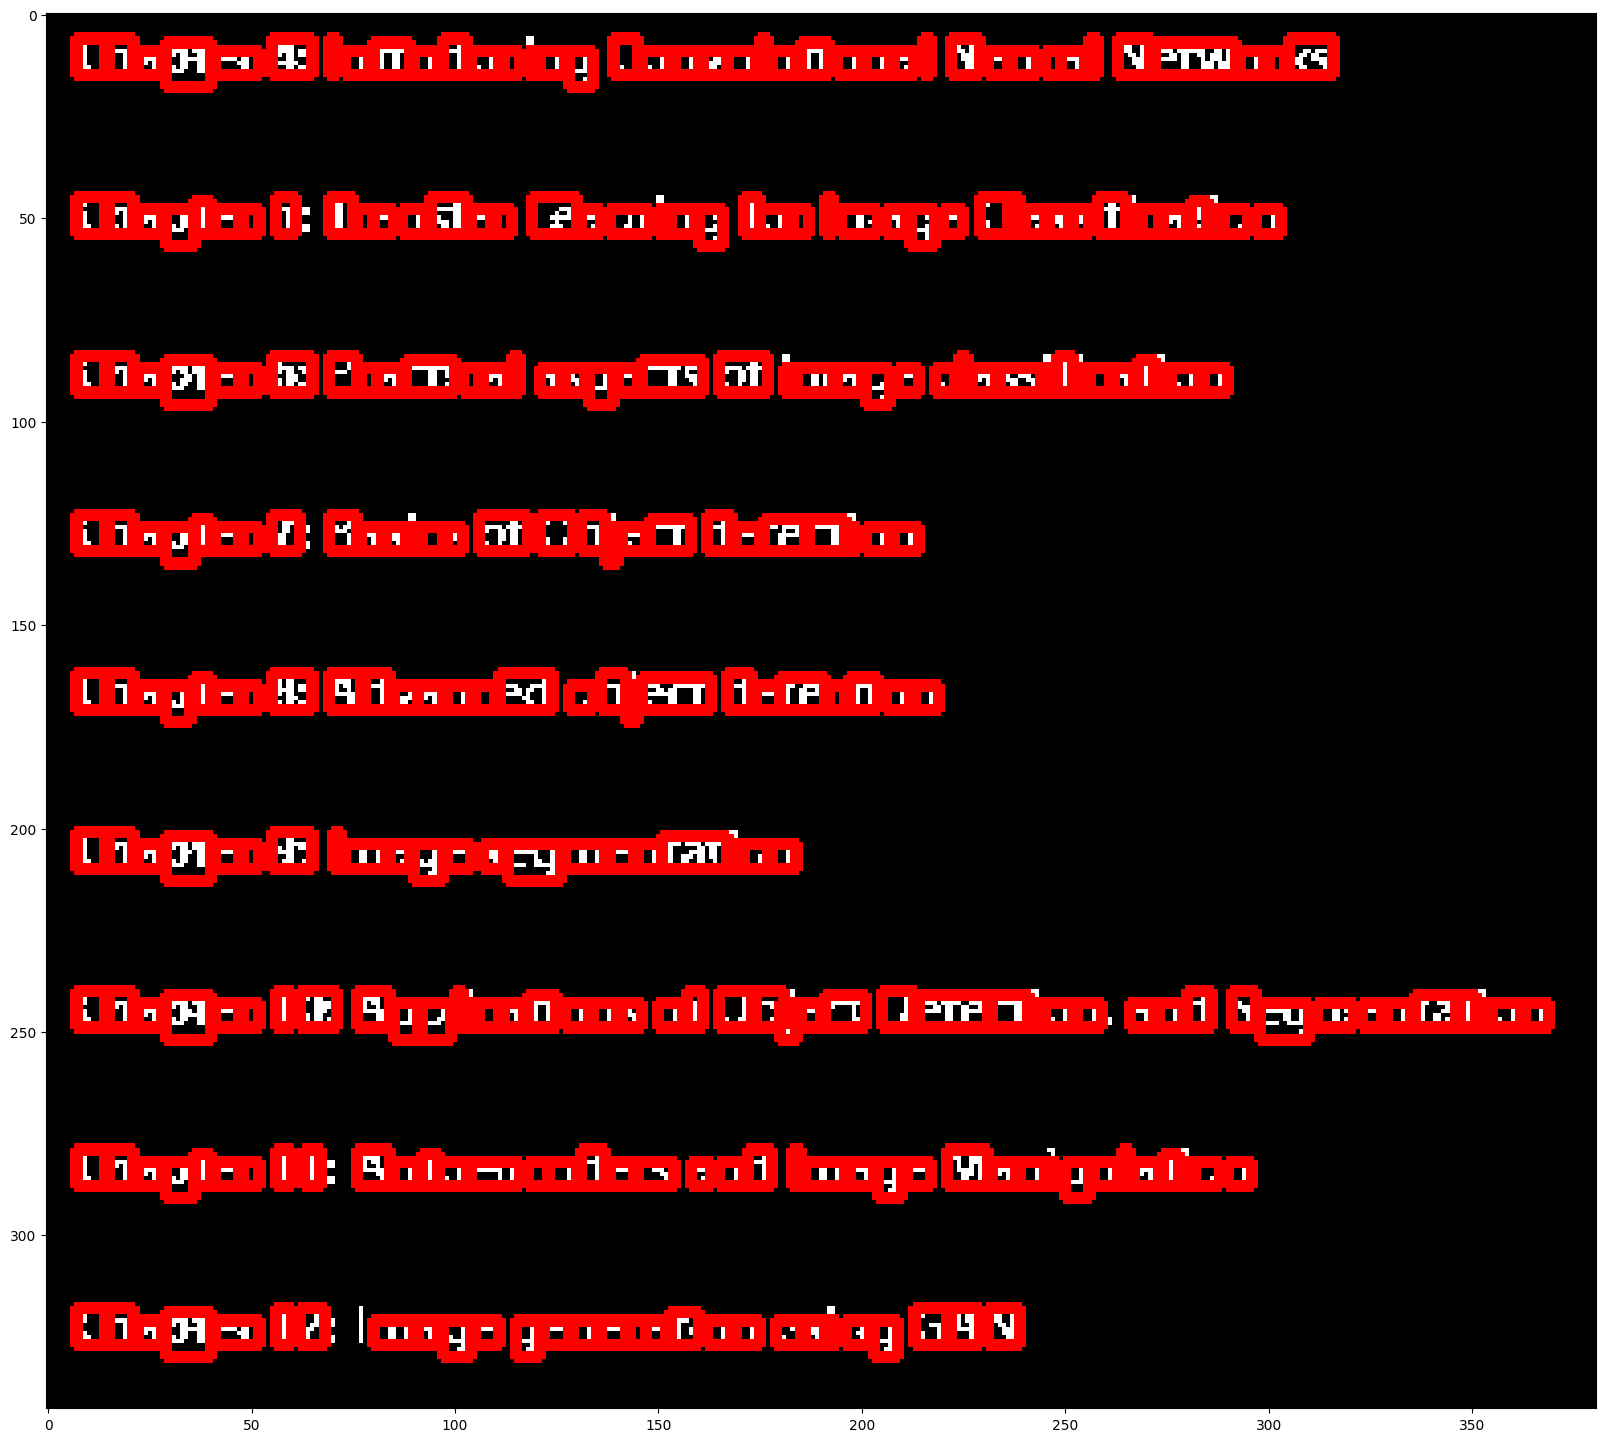

In [9]:
fig = plt.figure()
fig.set_size_inches(20, 20)
plt.imshow(thresh1)

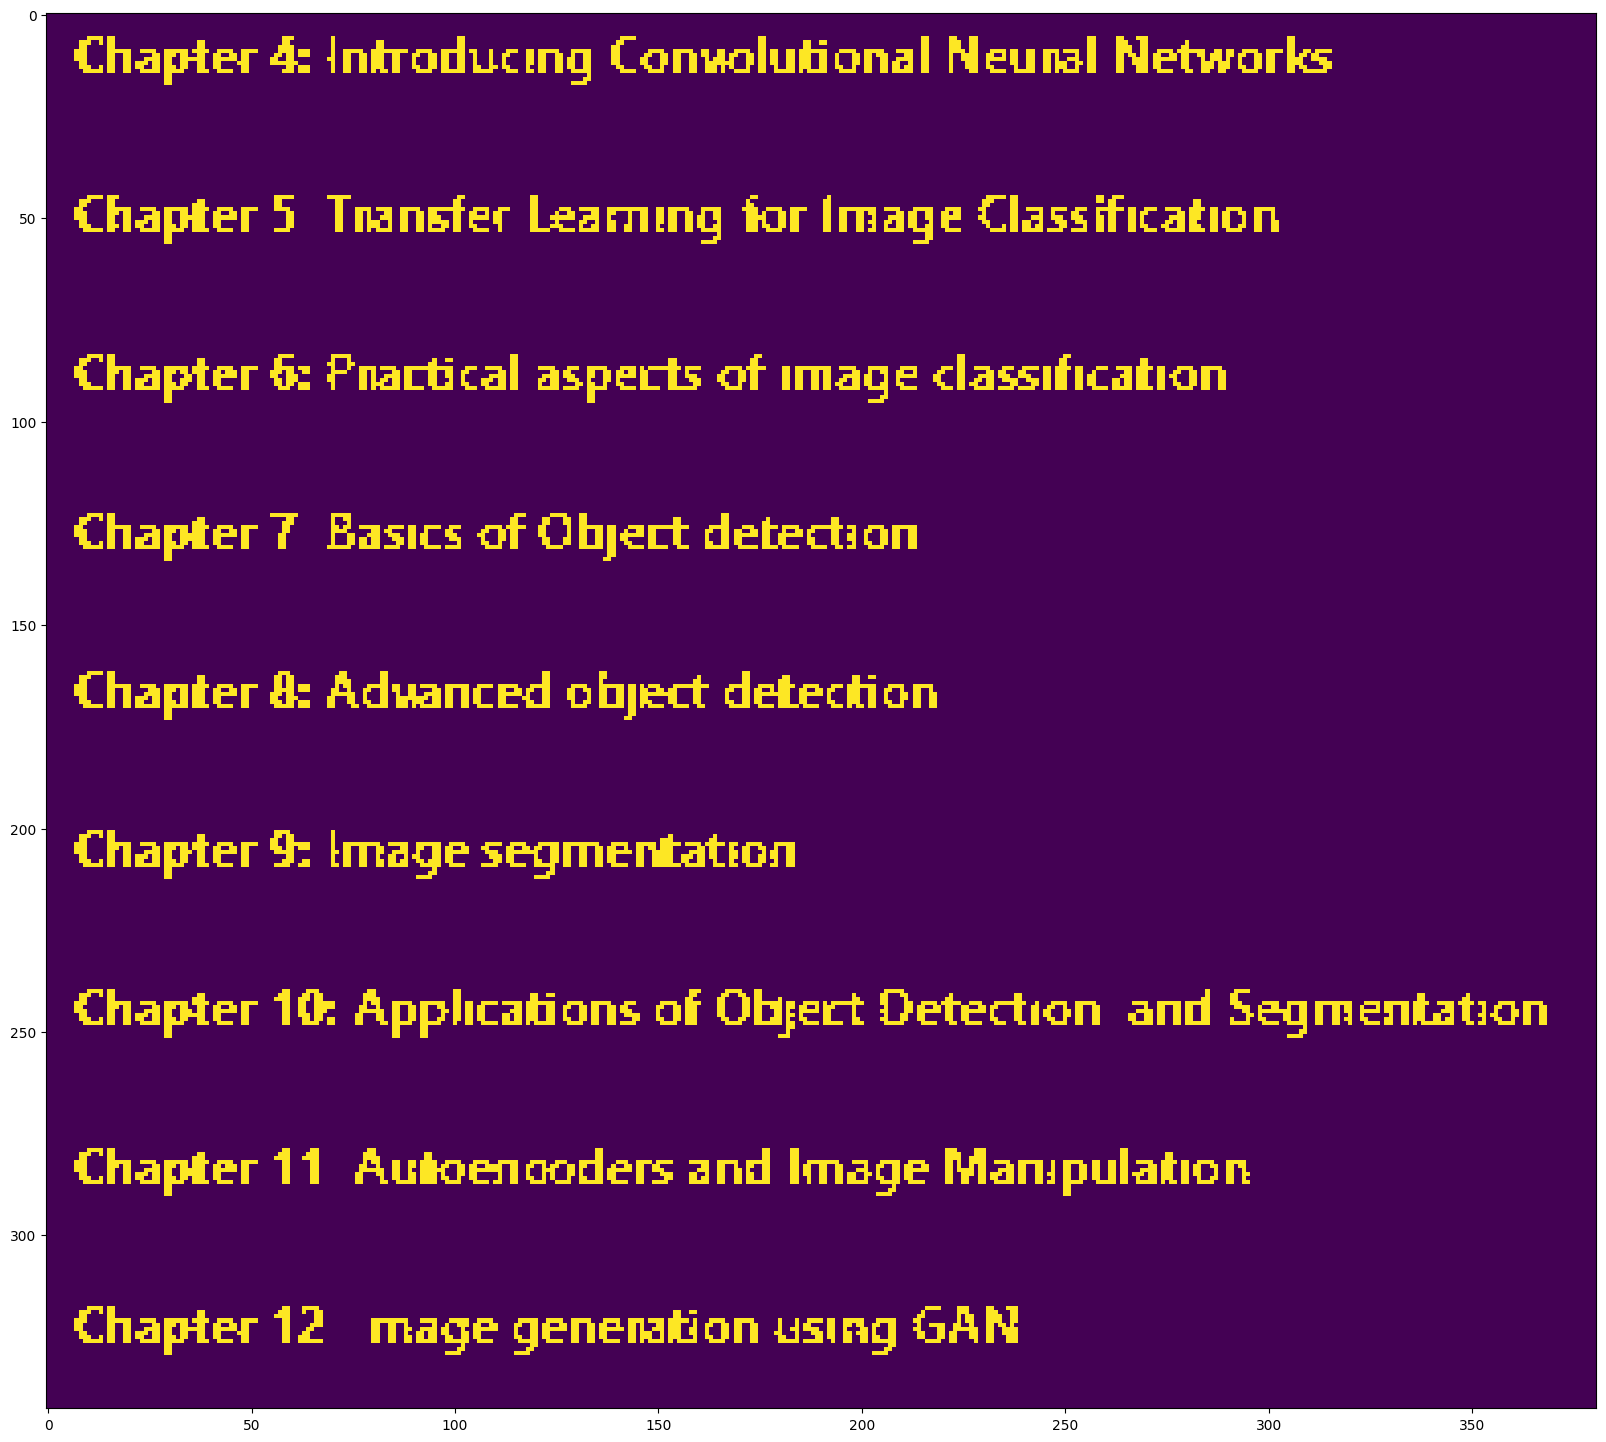

In [10]:
fig = plt.figure()
fig.set_size_inches(20, 20)
plt.imshow(thresh2)

In [11]:
dilated = cv2.dilate(thresh2, np.ones((1,2),np.uint8), iterations=1)

In [12]:
contours,hierarchy = cv2.findContours(np.uint8(dilated),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [13]:
for cnt in contours:
    if cv2.contourArea(cnt)>5:
        [x,y,w,h] = cv2.boundingRect(cnt)
        if ((h>5) & (h<100)):
            cv2.rectangle(img1, (x,y), (x+w,y+h), (255,0,0), 2)

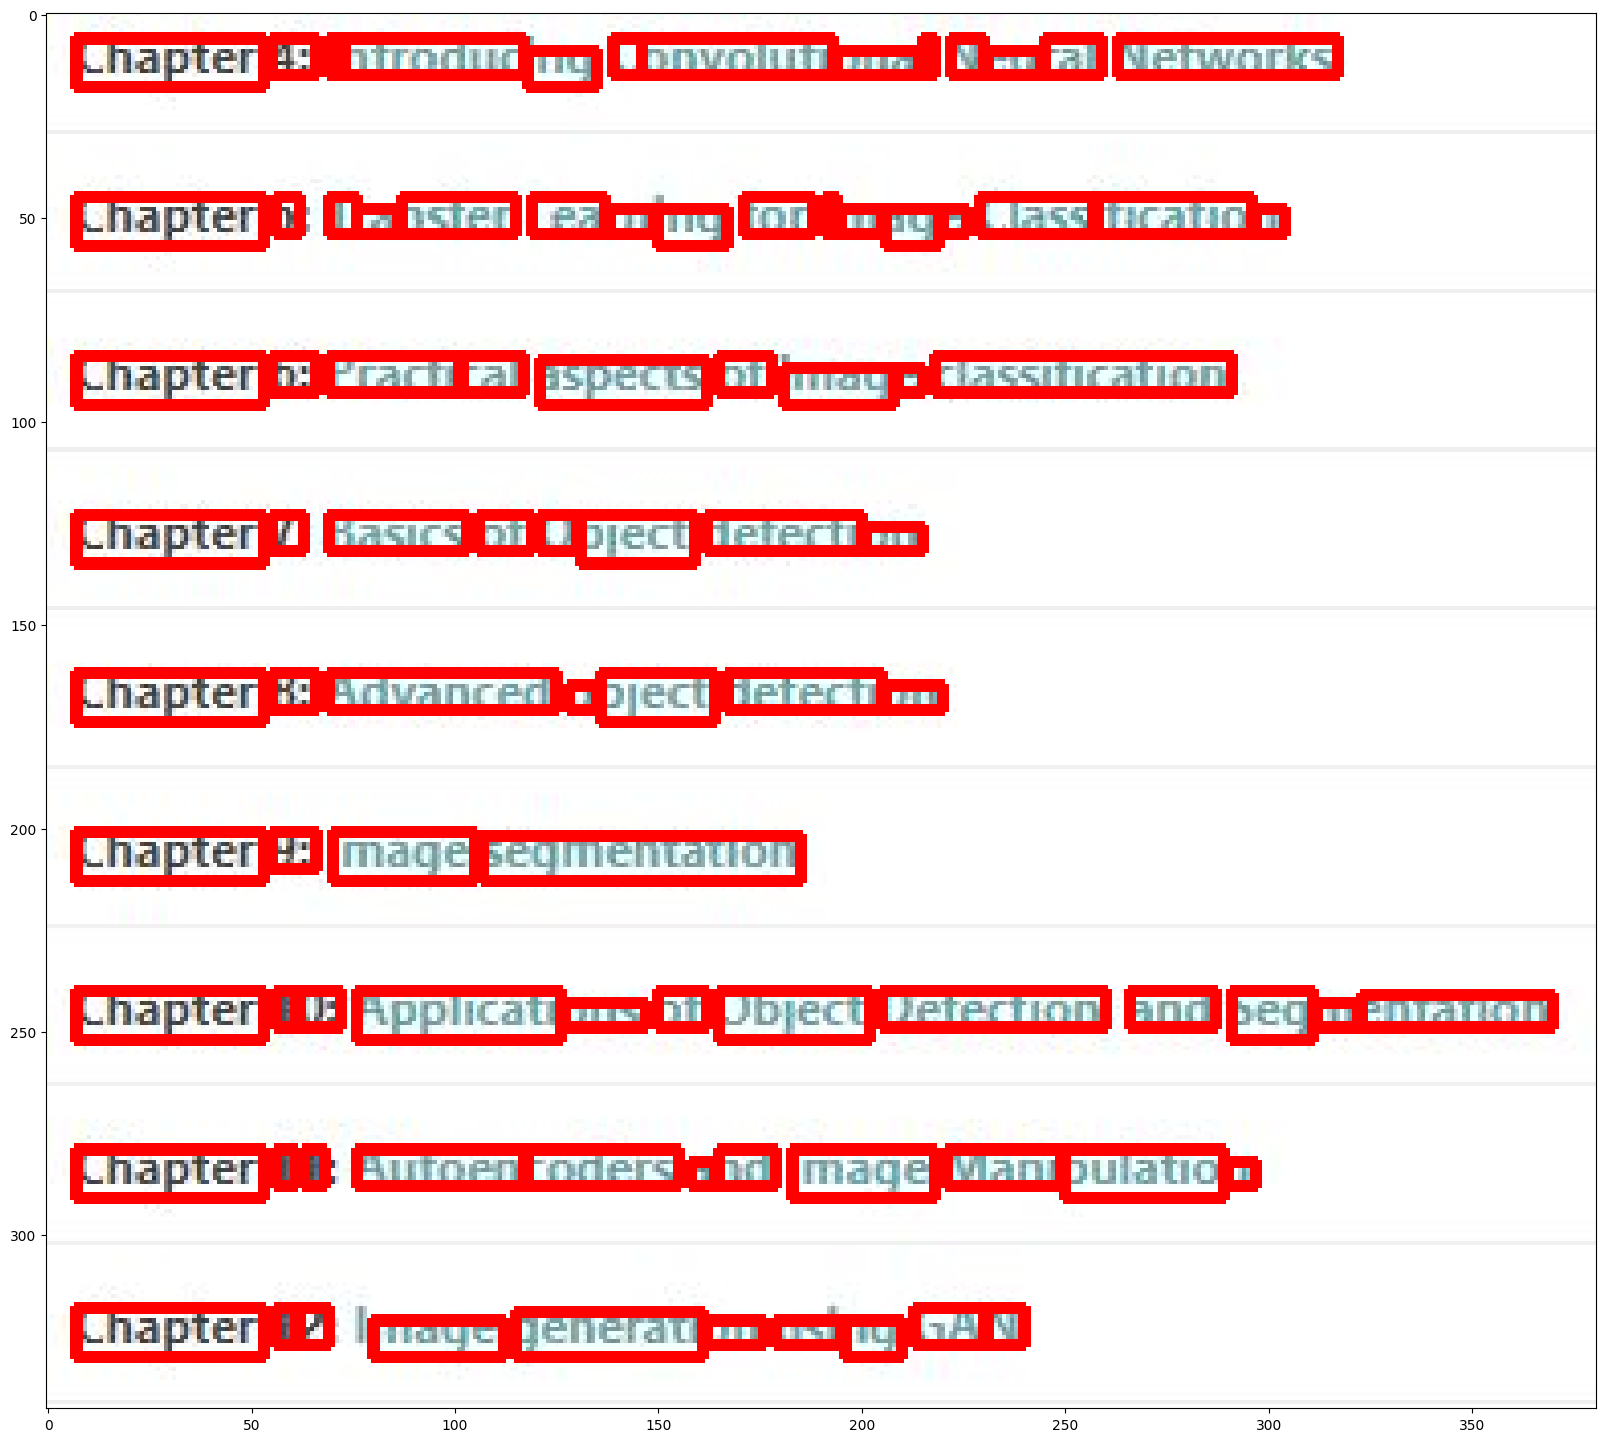

In [14]:
fig = plt.figure()
fig.set_size_inches(20,20)
plt.imshow(img1)

---